### FAA Wildlife strike

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data = pd.read_csv('strikes.csv')

In [123]:
#Shape
data.shape

(78, 94)

In [124]:
# Display first 4 rows
data.head(4)

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10.0,34.0,10.0,A,4.0,...,Deleted,Deleted,1992-05-14 00:00:00,FAA Form 5200-7,Pilot,NaN,NaN,1996-03-14 00:00:00,0,0
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26.0,34.0,40.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0


In [125]:
# the last five last rows
data.tail(4)

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
74,17459,MIL,MILITARY,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
75,17460,MIL,MILITARY,C-40,148,NaN,22.0,NaN,A,4.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
76,17461,MIL,MILITARY,T-38,665,NaN,22.0,62.0,A,2.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,1
77,17462,MIL,MILITARY,H-60,813,NaN,NaN,NaN,B,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0


In [126]:
#Display the columns
data.columns

Index(['INDEX_NR', 'OPID', 'OPERATOR', 'ATYPE', 'AMA', 'AMO', 'EMA', 'EMO',
       'AC_CLASS', 'AC_MASS', 'NUM_ENGS', 'TYPE_ENG', 'ENG_1_POS', 'ENG_2_POS',
       'ENG_3_POS', 'ENG_4_POS', 'REG', 'FLT', 'REMAINS_COLLECTED',
       'REMAINS_SENT', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR',
       'TIME_OF_DAY', 'TIME', 'AIRPORT_ID', 'AIRPORT', 'STATE', 'FAAREGION',
       'ENROUTE', 'RUNWAY', 'LOCATION', 'HEIGHT', 'SPEED', 'DISTANCE',
       'PHASE_OF_FLT', 'DAMAGE', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD',
       'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1',
       'STR_ENG2', 'DAM_ENG2', 'STR_ENG3', 'DAM_ENG3', 'STR_ENG4', 'DAM_ENG4',
       'INGESTED', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT',
       'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL',
       'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY',
       'EFFECT', 'EFFECT_OTHER', 'SKY', 'PRECIP', 'SPECIES_ID', 'SPECIES',
       'BIRDS_SEEN', 'BIRDS_STR

In [127]:
#number of occurance of each operator
operator_counts = data.value_counts(['OPERATOR'])
print(operator_counts)
print(type(operator_counts))

OPERATOR                      
UNKNOWN                           13
UNITED AIRLINES                   10
AMERICAN AIRLINES                  9
SKYWEST AIRLINES                   6
MILITARY                           5
UPS AIRLINES                       3
BUSINESS                           3
FEDEX EXPRESS                      3
ABX AIR                            2
MESA AIRLINES                      2
ATLANTIC SOUTHEAST                 2
SOUTHWEST AIRLINES                 2
CONTINENTAL AIRLINES               2
PINNACLE                           2
EXPRESSJET AIRLINES                2
SUN COUNTRY AIRLINES               1
EXPRESSJET (CONTINENTAL EXPRS)     1
HORIZON AIR                        1
AIR MIDWEST                        1
ENDEAVOR AIR                       1
COMAIR AIRLINES                    1
CHAUTAUQUA AIRLINES                1
CAPE AIR                           1
AMERICAN EAGLE AIRLINES            1
AMERICA WEST AIRLINES              1
AIRTRAN AIRWAYS                    1
WINGS W

In [128]:
#Save the operator names to a variable
operators=  operator_counts.index.to_list()
operators = [operator[0] for operator in operators]
operators

['UNKNOWN',
 'UNITED AIRLINES',
 'AMERICAN AIRLINES',
 'SKYWEST AIRLINES',
 'MILITARY',
 'UPS AIRLINES',
 'BUSINESS',
 'FEDEX EXPRESS',
 'ABX AIR',
 'MESA AIRLINES',
 'ATLANTIC SOUTHEAST',
 'SOUTHWEST AIRLINES',
 'CONTINENTAL AIRLINES',
 'PINNACLE',
 'EXPRESSJET AIRLINES',
 'SUN COUNTRY AIRLINES',
 'EXPRESSJET (CONTINENTAL EXPRS)',
 'HORIZON AIR',
 'AIR MIDWEST',
 'ENDEAVOR AIR',
 'COMAIR AIRLINES',
 'CHAUTAUQUA AIRLINES',
 'CAPE AIR',
 'AMERICAN EAGLE AIRLINES',
 'AMERICA WEST AIRLINES',
 'AIRTRAN AIRWAYS',
 'WINGS WEST']

In [129]:
counts = np.array(operator_counts.values)

/var/folders/z4/09f8nznd62590w_40xywchf00000gn/T/ipykernel_31355/1199251565.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=operators[:10], y=counts[:10], palette=paired_palette)


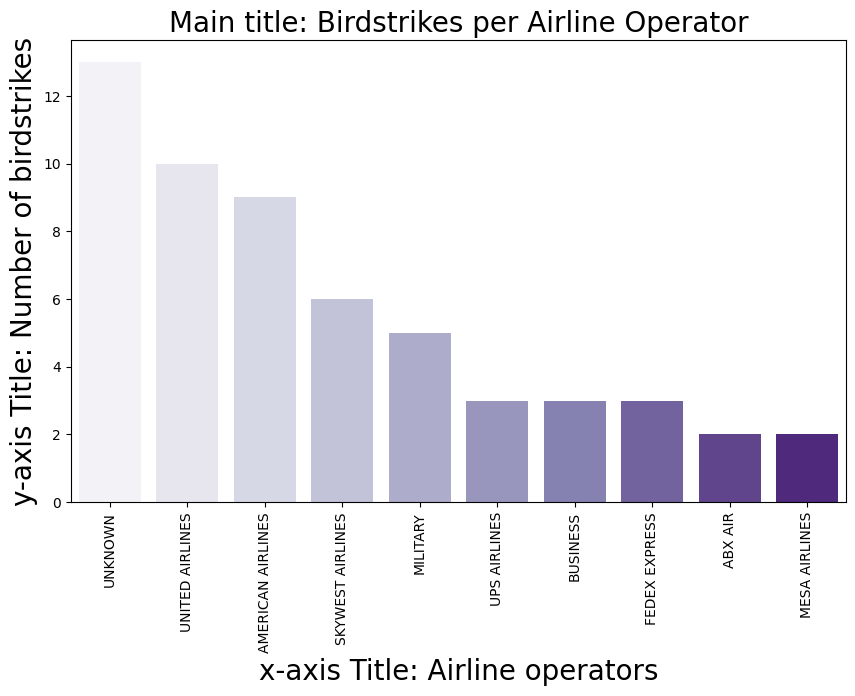

In [148]:

paired_palette = sns.color_palette('Purples',10)
sns.set_palette(paired_palette)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel("x-axis Title: Airline operators", fontsize=20)
plt.ylabel("y-axis Title: Number of birdstrikes", fontsize=20)
plt.title("Main title: Birdstrikes per Airline Operator", fontsize=20)
barplot = sns.barplot(x=operators[:10], y=counts[:10], palette=paired_palette)